In [131]:
from tensorflow.keras.datasets.cifar10 import load_data
from tensorflow.keras import Sequential
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.image import resize
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

from sklearn.model_selection import train_test_split

import numpy as np
import matplotlib.pyplot as plt

In [114]:
(x_train, y_train), (x_test, y_test) = load_data()

In [115]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

# 3차원 이미지구나! (RGB 이미지구나!)

(50000, 32, 32, 3) (50000, 1)
(10000, 32, 32, 3) (10000, 1)


In [116]:
x_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [117]:
import matplotlib.pyplot as plt

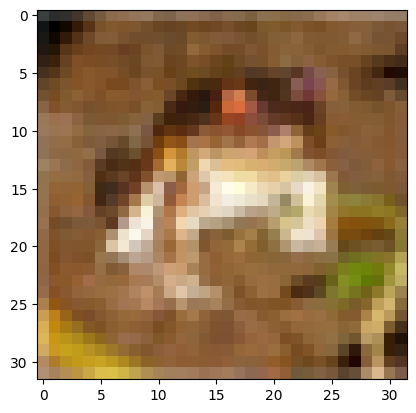

In [118]:
plt.imshow(x_train[0])
# 공식문서 : https://www.tensorflow.org/api_docs/python/tf/keras/datasets/cifar10/load_data

0	airplane

1	automobile

2	bird

3	cat

4	deer

5	dog

6	frog

7	horse

8	ship

9	truck

In [119]:
y_train[0]

array([6], dtype=uint8)

In [120]:
cifar10_names = ["airplane","automobile","bird","cat","deer", "dog","frog","horse","ship","truck"]

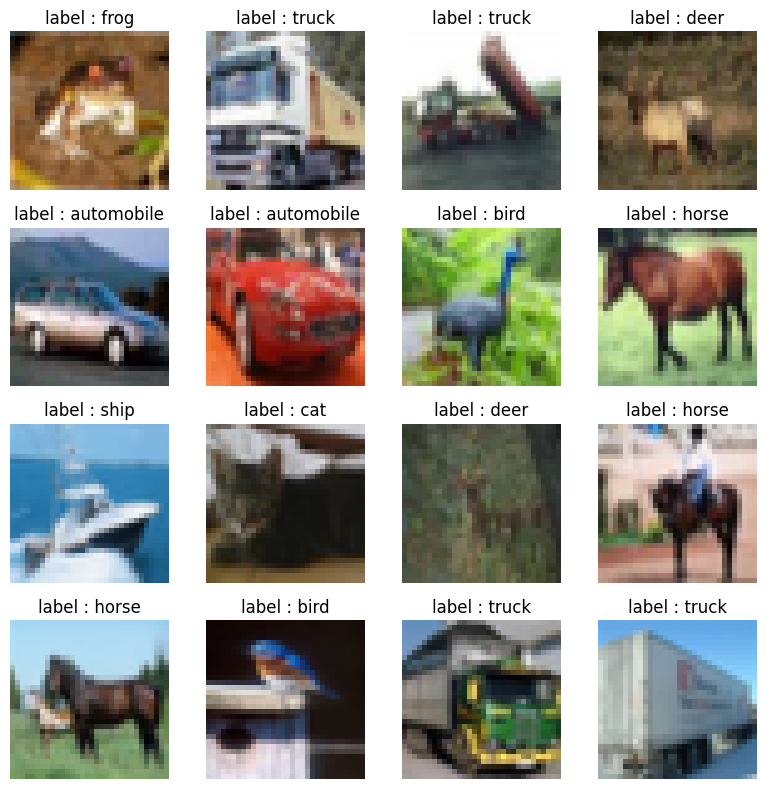

In [121]:
plt.figure(figsize=(8, 8))

for idx, sample in enumerate(x_train[:16]):
    plt.subplot(4, 4, idx+1)
    plt.axis("off")
    plt.imshow(sample)
    plt.title(f"label : {cifar10_names[y_train[idx][0]]}")

plt.tight_layout()
plt.show()

In [122]:
# 스케일링
x_train_scale = x_train / 255.0
x_test_scale = x_test / 255.0


In [123]:
# 모델 준비
model = Sequential()

In [124]:
# 문제 풀기
# 레이어 추가 (CNN으로)
# convolution / pooling 총 3번 진행
# 커널 사이즈 : (3, 3) / 풀링 사이즈 : (2, 2)
# padding 안 함

# fully-connected layer는
# flatten 후 히든층 하나, 출력층 하나로

# ---------------------------------------------------

# train shape를 봤을 때 (32 * 32 * 3) 이기 때문에
model.add(Conv2D(23, kernel_size=(3, 3), input_shape=(32, 32, 3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, kernel_size=(3, 3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, kernel_size=(3, 3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))

# 1차원으로 만들기
model.add(Flatten())
model.add(Dense(128, activation="relu"))

model.add(Dense(10, activation="softmax"))

In [132]:
# 나머지 추가
# optimizer : 가중치를 조율함
# 원 핫 인코딩을 해야 해서 
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["acc"])

In [134]:
# 학습
# *** 앞에 스케일한 x를 넣어야 함
result = model.fit(x_train_scale, y_train, epochs=10, batch_size=100, validation_data=(x_test_scale, y_test))

Epoch 1/10
500/500 [==============================] - 36s 71ms/step - loss: 1.4924 - acc: 0.4604 - val_loss: 361.8848 - val_acc: 0.2338
Epoch 2/10
500/500 [==============================] - 35s 69ms/step - loss: 1.0690 - acc: 0.6220 - val_loss: 293.2421 - val_acc: 0.3252
Epoch 3/10
500/500 [==============================] - 34s 69ms/step - loss: 0.9162 - acc: 0.6782 - val_loss: 215.0721 - val_acc: 0.3615
Epoch 4/10
500/500 [==============================] - 35s 70ms/step - loss: 0.8237 - acc: 0.7120 - val_loss: 329.6194 - val_acc: 0.3445
Epoch 5/10
500/500 [==============================] - 35s 69ms/step - loss: 0.7575 - acc: 0.7363 - val_loss: 245.0345 - val_acc: 0.3765
Epoch 6/10
500/500 [==============================] - 35s 69ms/step - loss: 0.6993 - acc: 0.7561 - val_loss: 289.3449 - val_acc: 0.3757
Epoch 7/10
500/500 [==============================] - 34s 68ms/step - loss: 0.6462 - acc: 0.7732 - val_loss: 306.6390 - val_acc: 0.3875
Epoch 8/10
500/500 [============================

In [133]:
model.summary()
# None : 몇 개 들어올 지 모름

# (None, 2, 2, 128) 
# 2 *2 사이즈가 128장이 모여서 붙어있음
# 그걸 한 줄로 펴서 학습을 함

# (None, 512)
# 4차원을 2차원으로 바꾼거구나

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_19 (Conv2D)          (None, 30, 30, 23)        644       
                                                                 
 max_pooling2d_15 (MaxPooli  (None, 15, 15, 23)        0         
 ng2D)                                                           
                                                                 
 conv2d_20 (Conv2D)          (None, 13, 13, 128)       26624     
                                                                 
 max_pooling2d_16 (MaxPooli  (None, 6, 6, 128)         0         
 ng2D)                                                           
                                                                 
 conv2d_21 (Conv2D)          (None, 4, 4, 128)         147584    
                                                                 
 max_pooling2d_17 (MaxPooli  (None, 2, 2, 128)        

In [137]:
# 평가
model.evaluate(x_test_scale, y_test)

313/313 [==============================] - 2s 8ms/step - loss: 0.8206 - acc: 0.7352


[0.8205699324607849, 0.7351999878883362]

In [138]:
import numpy as np

In [140]:
# 예측
predict = model.predict(x_test_scale)
predict_labels = np.argmax(predict, axis=1)
print(predict_labels)
print(y_test.reshape(-1))

313/313 [==============================] - 2s 8ms/step
[3 8 8 ... 5 1 7]
[3 8 8 ... 5 1 7]
